In [1]:
import os
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
stateCodes=pickle.load(open("stateCode.pickle","rb"))
paths=[str(i)+'/' for i in stateCodes]

yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
 
# New CARB
carbA=[6,41,53,8,16,31,40,49]
carbB=[9,10,23,24,25,34,36,42,44,50,11,13]

noState = ['"Guam"','"Puerto Rico"','"Hawaii"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]

In [3]:
stateCodes

OrderedDict([(1, '"Alabama"'),
             (2, '"Alaska"'),
             (4, '"Arizona"'),
             (5, '"Arkansas"'),
             (6, '"California"'),
             (8, '"Colorado"'),
             (9, '"Connecticut"'),
             (10, '"Delaware"'),
             (11, '"District Of Columbia"'),
             (12, '"Florida"'),
             (13, '"Georgia"'),
             (15, '"Hawaii"'),
             (16, '"Idaho"'),
             (17, '"Illinois"'),
             (18, '"Indiana"'),
             (19, '"Iowa"'),
             (20, '"Kansas"'),
             (21, '"Kentucky"'),
             (22, '"Louisiana"'),
             (23, '"Maine"'),
             (24, '"Maryland"'),
             (25, '"Massachusetts"'),
             (26, '"Michigan"'),
             (27, '"Minnesota"'),
             (28, '"Mississippi"'),
             (29, '"Missouri"'),
             (30, '"Montana"'),
             (31, '"Nebraska"'),
             (32, '"Nevada"'),
             (33, '"New Hampshire"'),
         

In [4]:

data=OrderedDict()
for path in paths:
    key=path[:-1]
    f=open('{}/CorrelationsSummary/networkfeautures.csv'.format(key),'r')

    for l in f:
        row=l.strip().split(',')
        year=row[0].split('/')[-1]
        CC = float(row[-1]) if row[-1] !='float division by zero' else None
        if key not in data:
            data[key]=OrderedDict()
        data[key][year]=CC

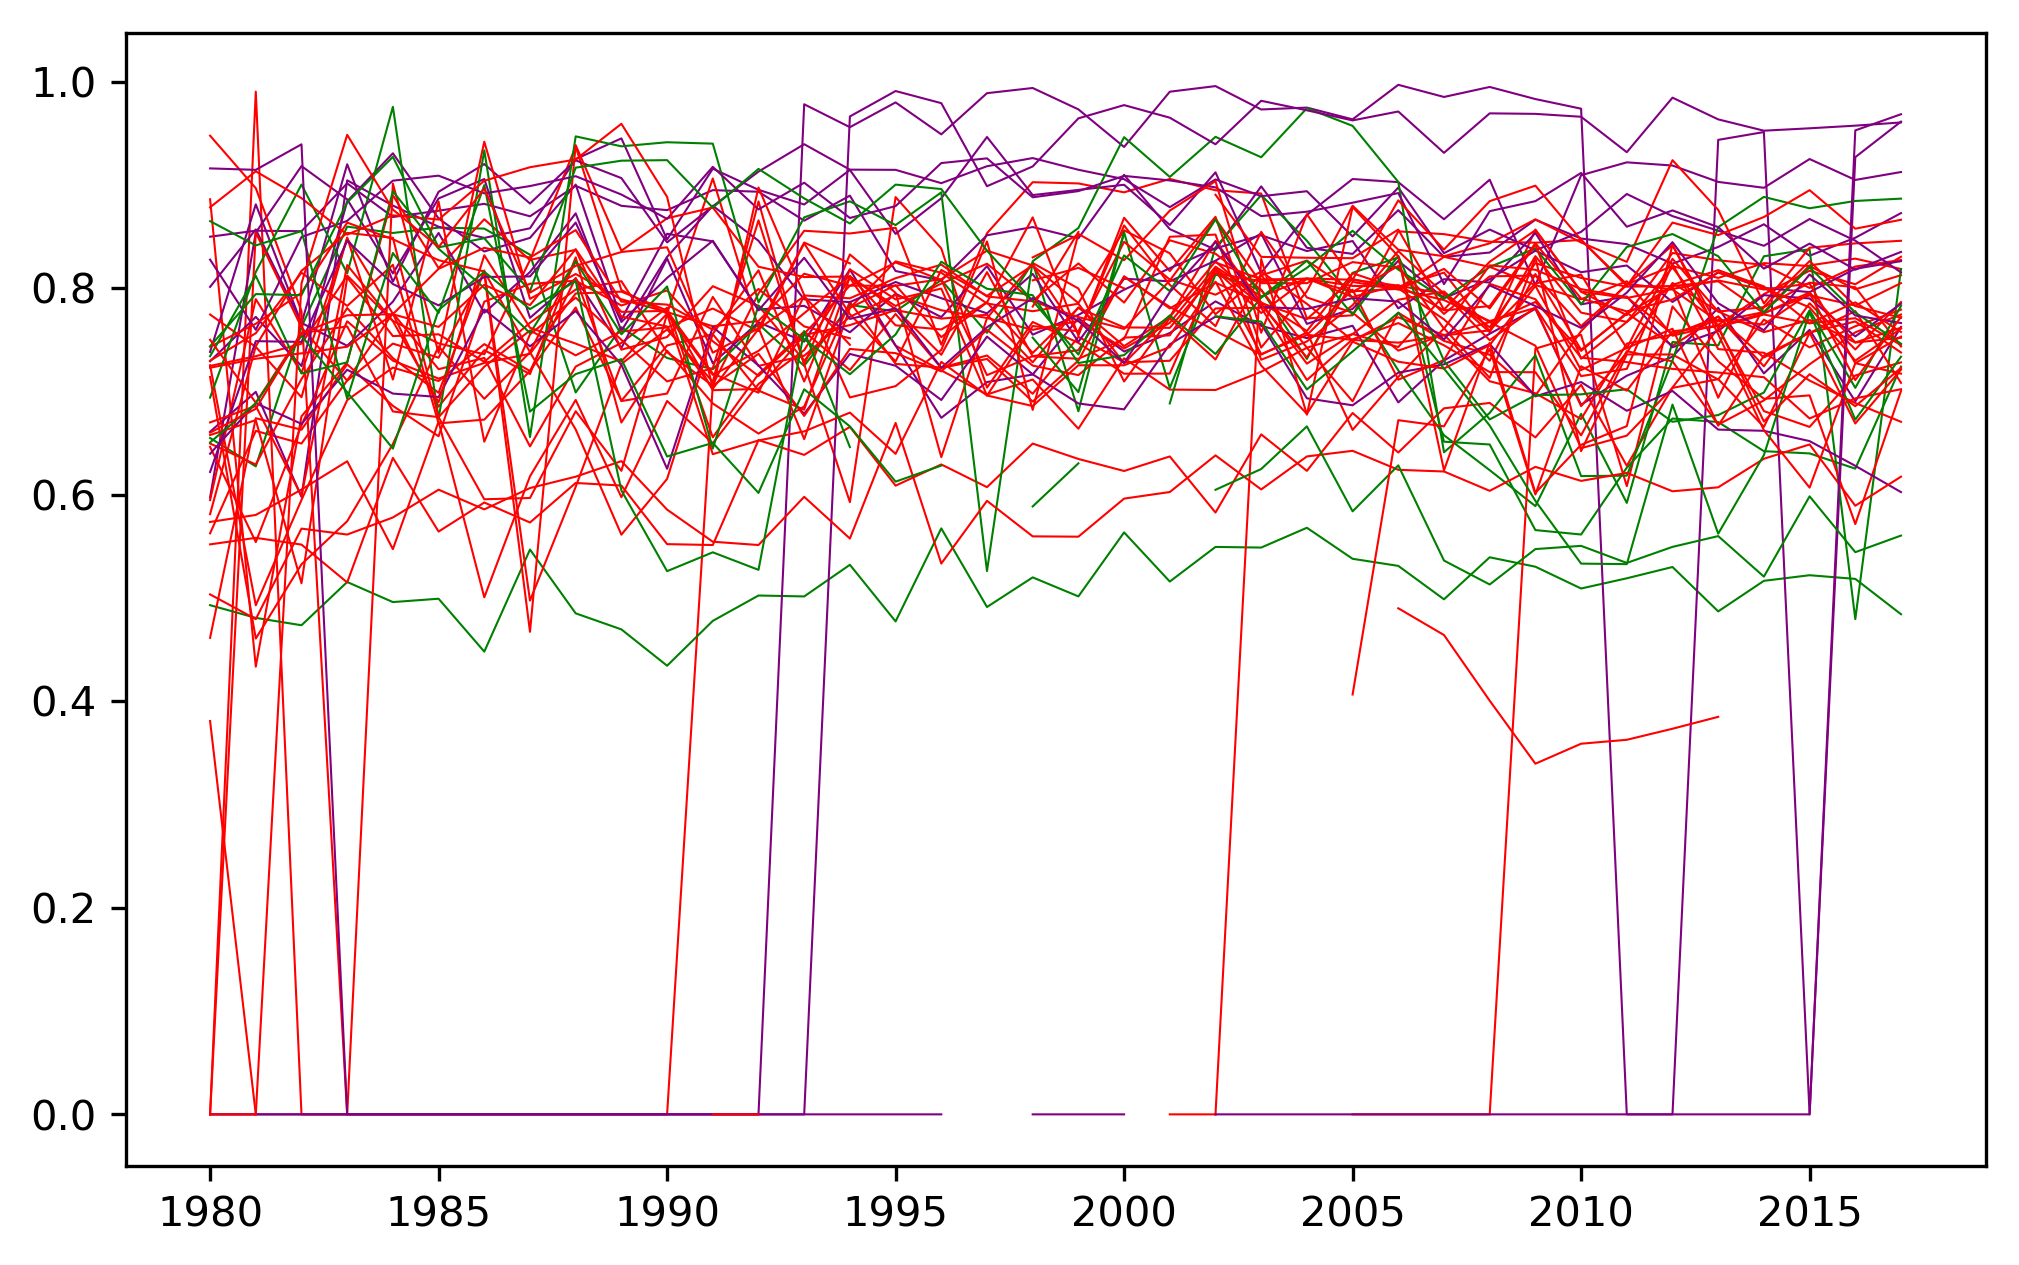

In [5]:
plt.close()
width=0.5
plt.subplots(figsize=(8,5),dpi=300)
for codes in data:
    intCode = int(codes)
    if intCode in carbA:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='g',linewidth=width)
    elif intCode in carbB:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='purple',linewidth=width)
    else:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='r',linewidth=width)

plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
#plt.legend(loc='center',bbox_to_anchor=(0.5, 1.05),ncol=10,frameon=False)
plt.show()

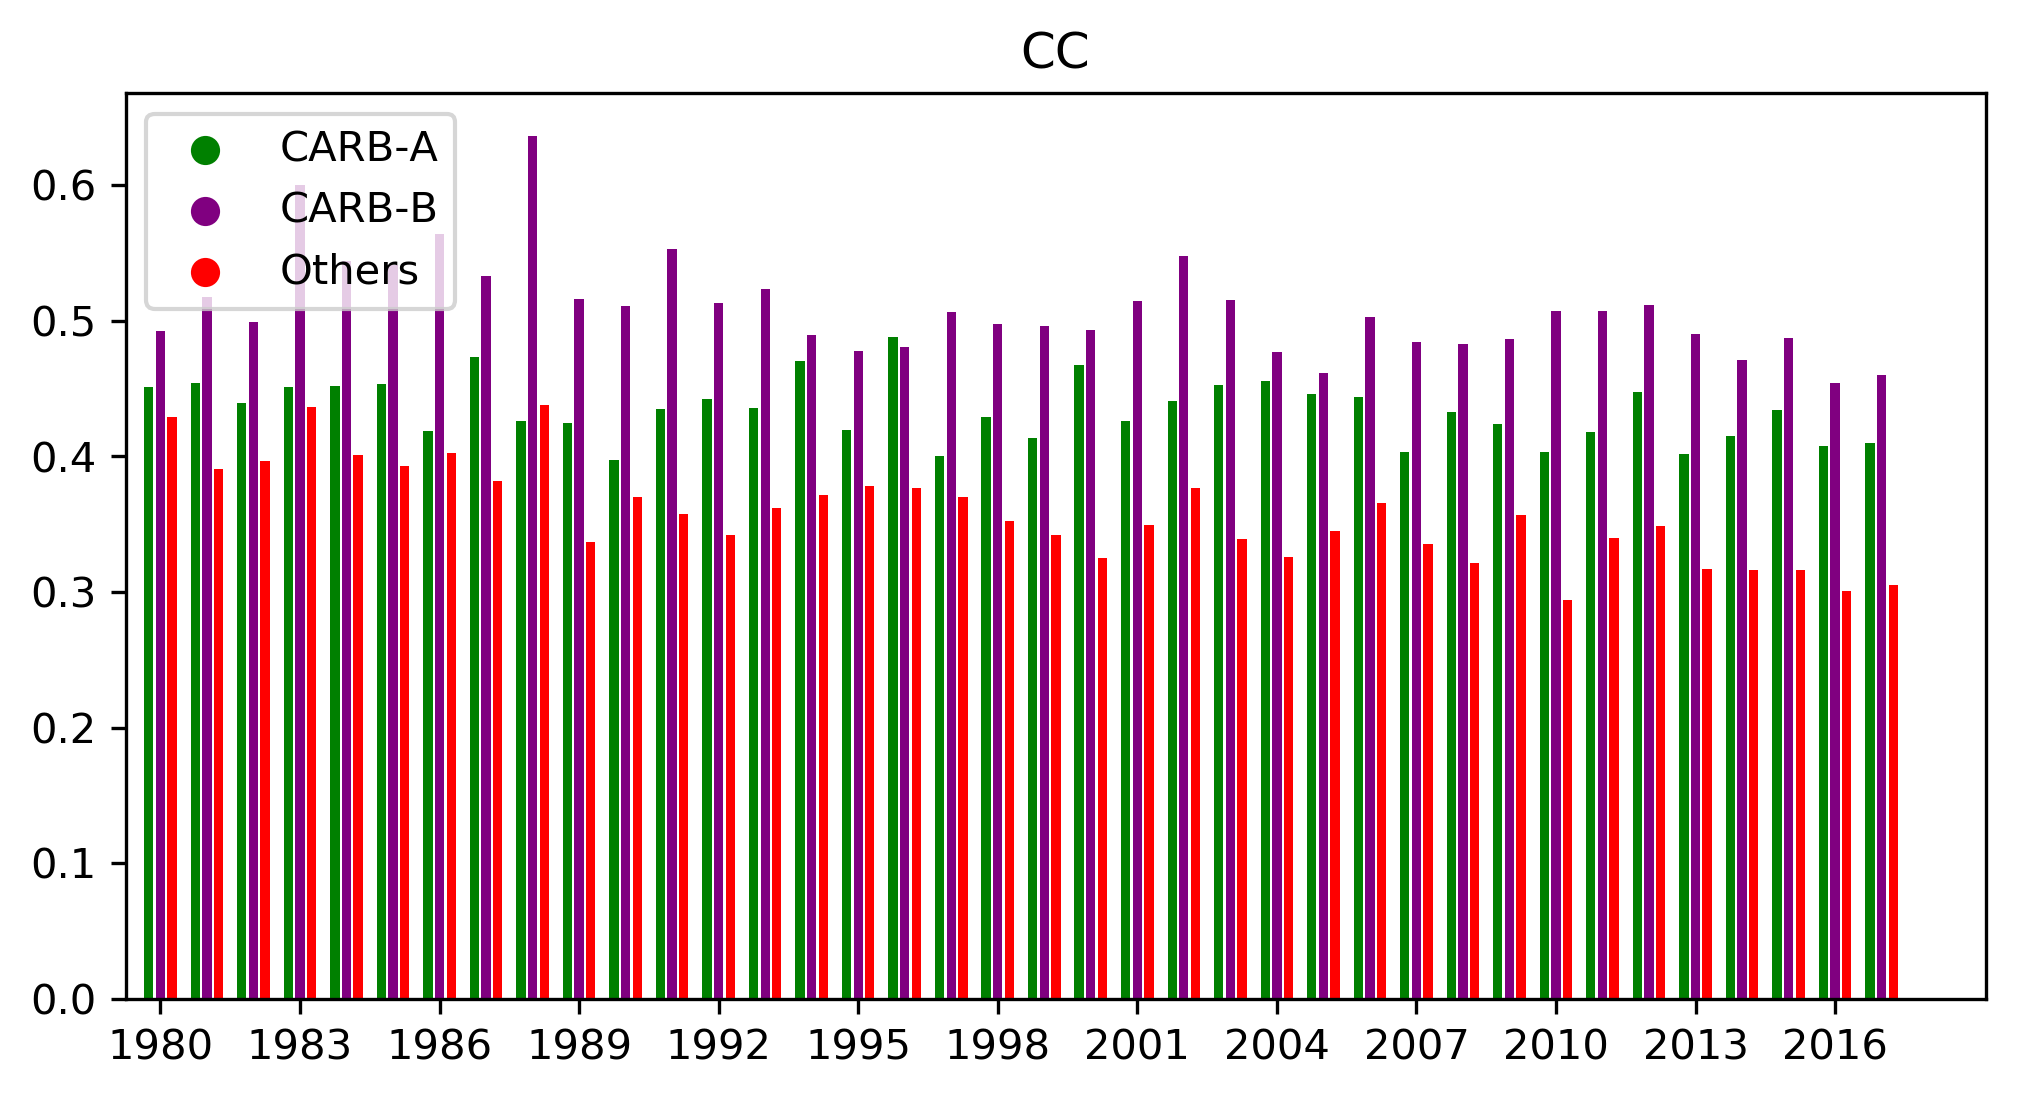

In [6]:


regionData=OrderedDict()
for codes in ['NEWCARBA','NEWCARBB','NEWNONCARB']:
    f=open('{}/CorrelationSummary/networkfeautures.csv'.format(codes),'r')
    for l in f:
        row=l.strip().split(',')
        year=row[0].split('/')[-1]
        CC = float(row[-1]) if row[-1] !='float division by zero' else None
        if year not in regionData:
            regionData[year]={}
        regionData[year][codes]=CC
       
      
plt.close()
plt.subplots(figsize=(8,4),dpi=300)  
for year,index in zip(regionData,range(0,4*len(regionData),4)):
    #print(year,index,regionData[year]['A'])
    plt.bar(index-1,regionData[year]['NEWCARBA'],color='g')
    plt.bar(index,regionData[year]['NEWCARBB'],color='purple')
    plt.bar(index+1,regionData[year]['NEWNONCARB'],color='r')

plt.xlim(-3,None)
plt.ylim(0,None)
plt.scatter(-5,-5,color='g',label='CARB-A')
plt.scatter(-5,-5,color='purple',label='CARB-B')
plt.scatter(-5,-5,color='r',label='Others')
plt.legend(loc='upper left')
plt.xticks(list(range(0,4*len(regionData),4))[::3],[i for i in regionData][::3])
plt.title("CC")
plt.show()

In [7]:
ndata=[]
for codes in data:
    ndata.append([data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]])

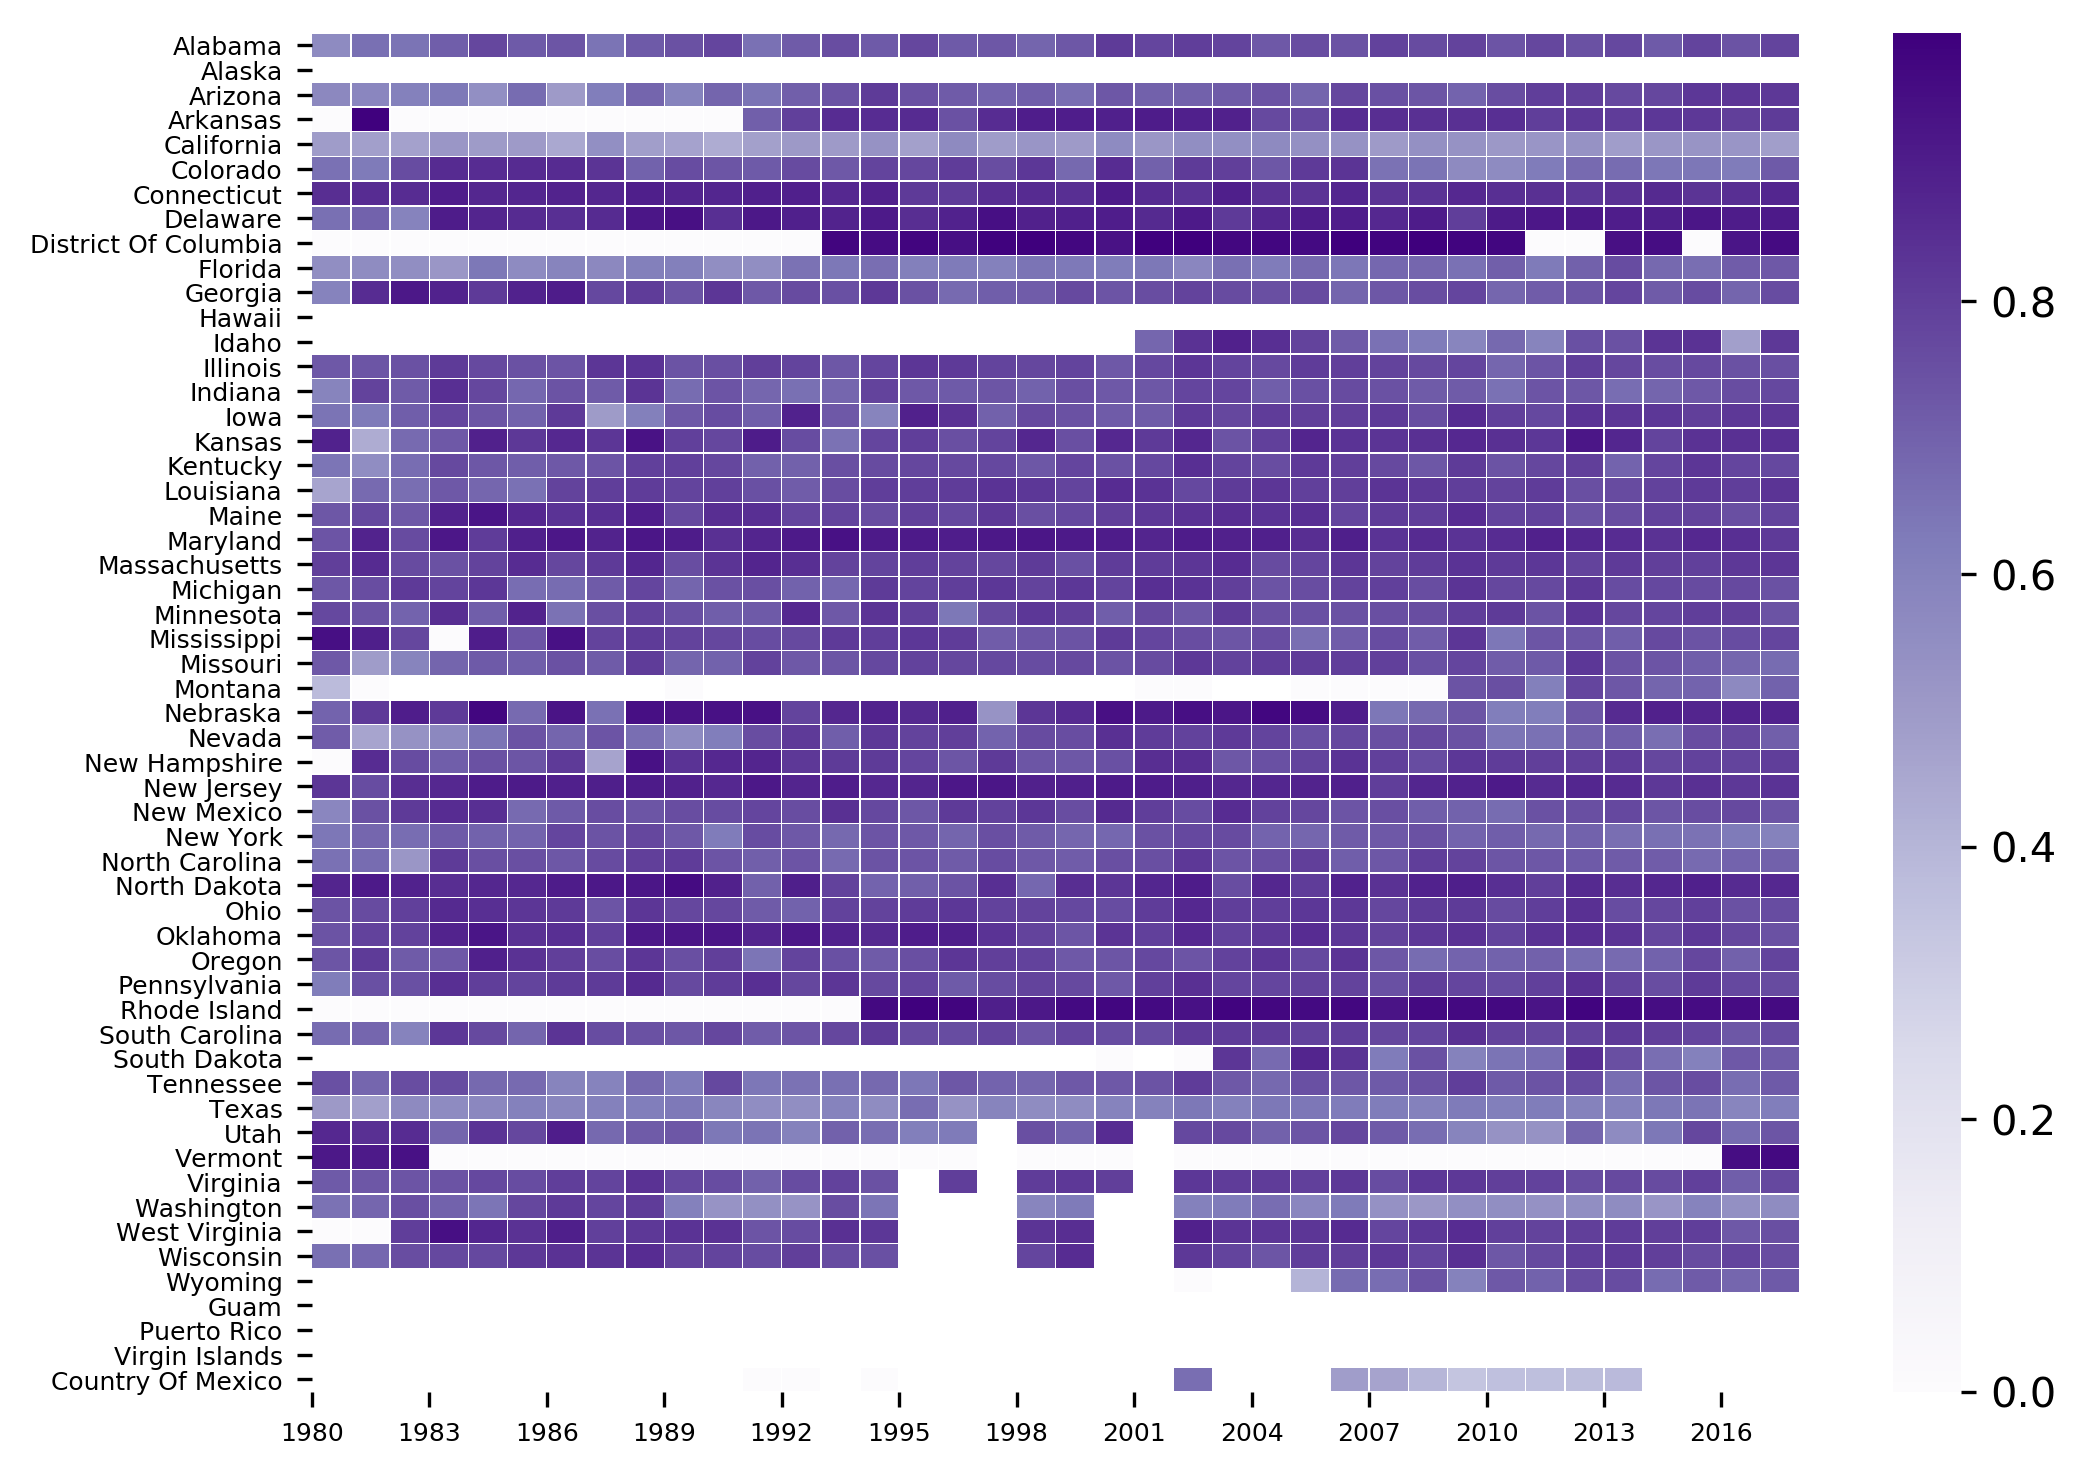

In [8]:
plt.close()
plt.subplots(figsize=(8,6),dpi=300) 

sns.heatmap(ndata,linewidth=0.1,cmap=plt.get_cmap('Purples'))
plt.yticks([i+0.5 for i in range(len(data))],[stateCodes[int(i)].replace('"','') for i in data],size=6)
plt.xticks(list(range(len(yearMap)))[::3],list(yearMap)[::3],size=6)
plt.show()

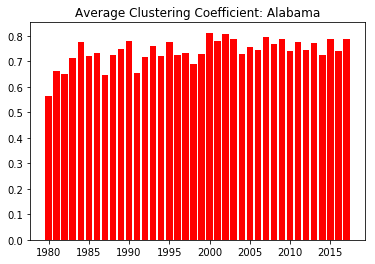

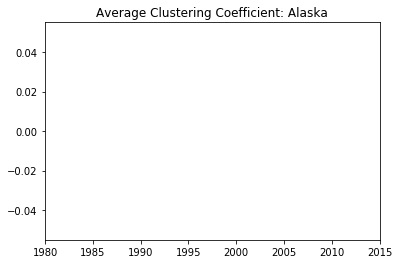

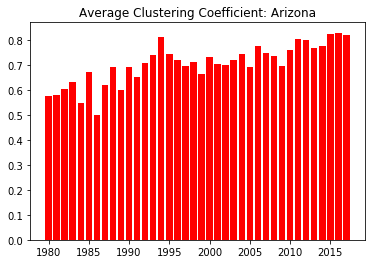

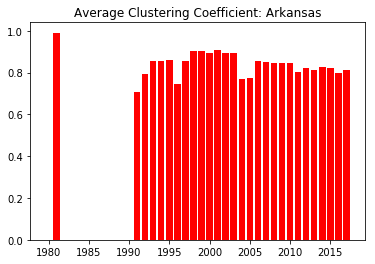

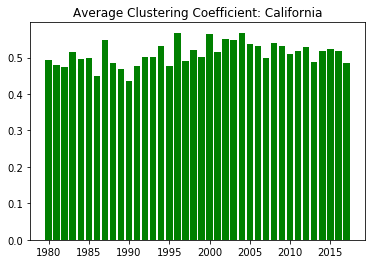

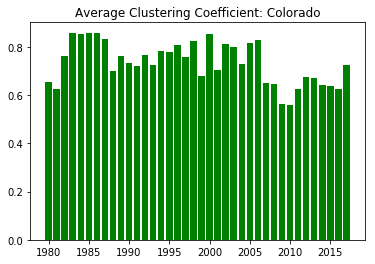

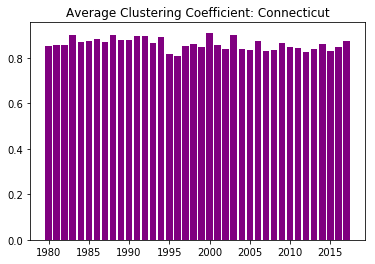

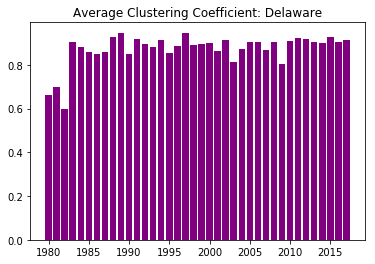

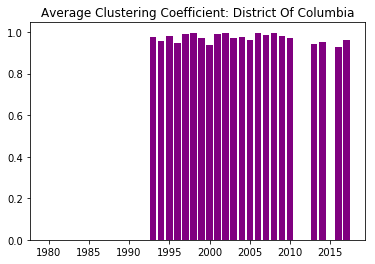

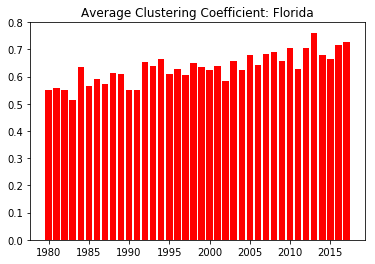

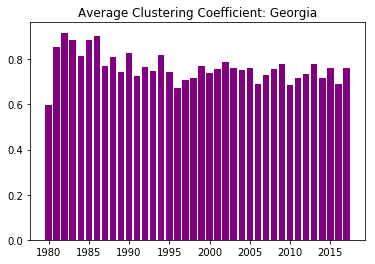

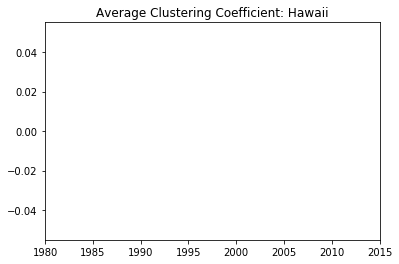

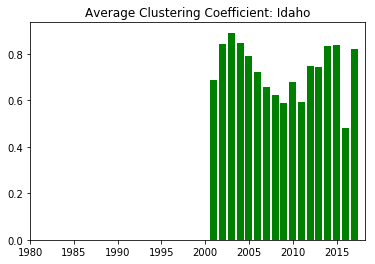

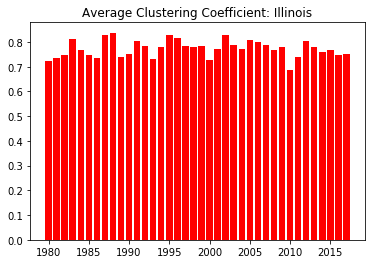

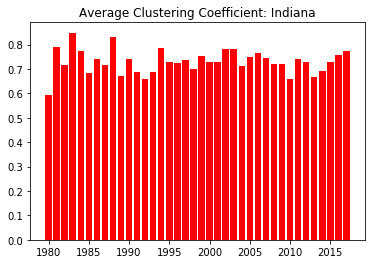

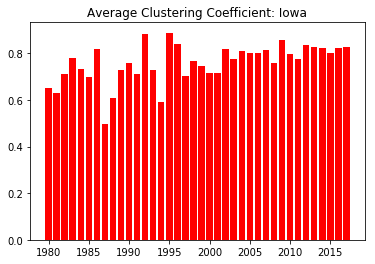

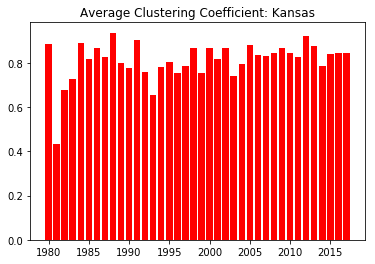

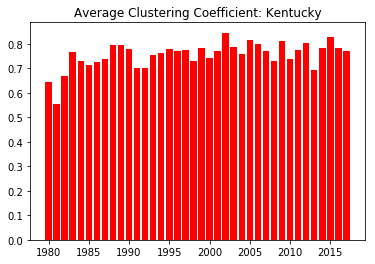

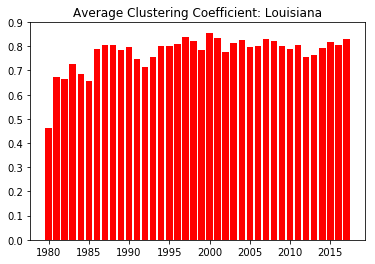

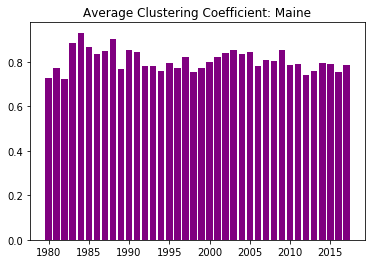

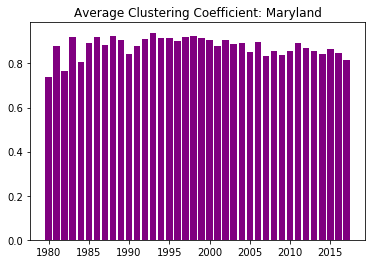

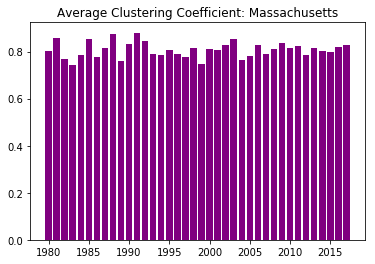

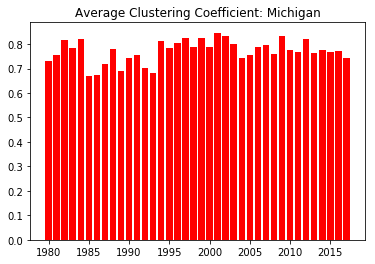

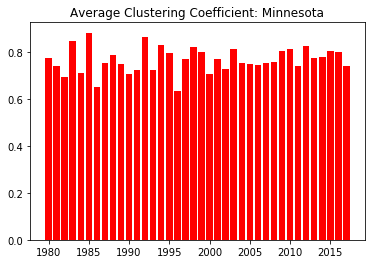

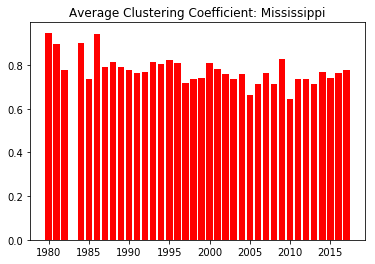

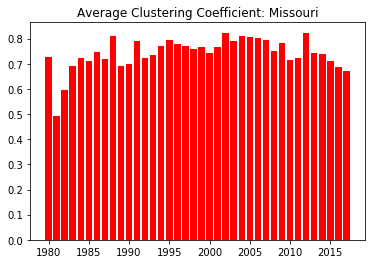

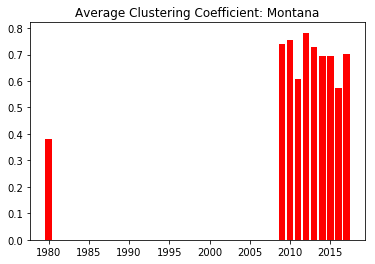

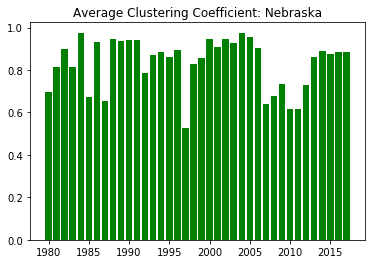

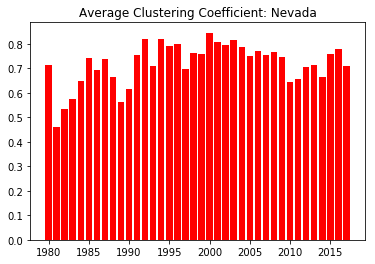

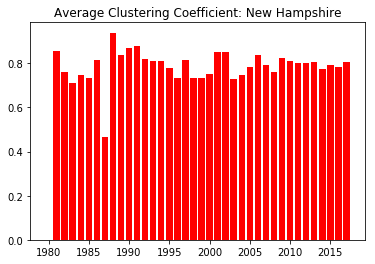

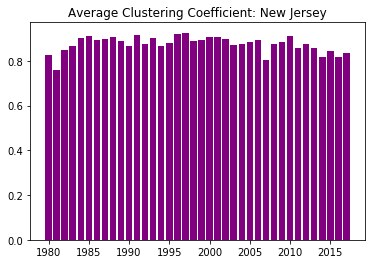

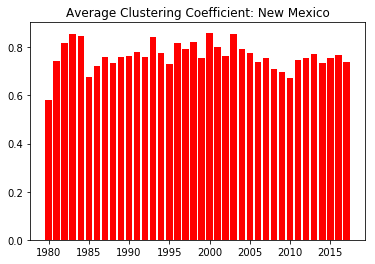

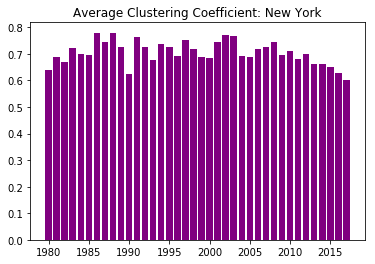

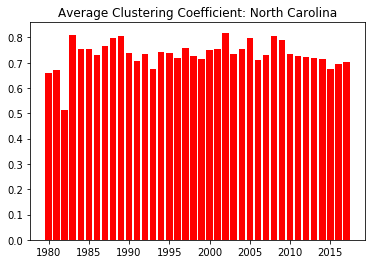

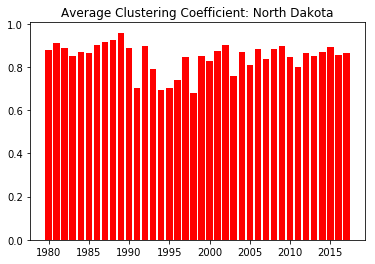

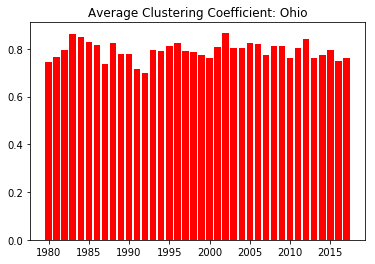

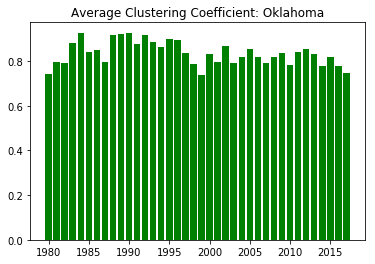

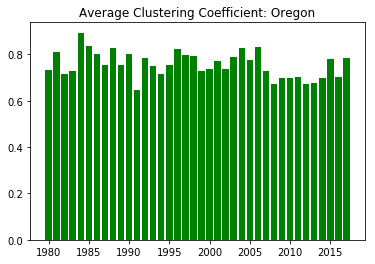

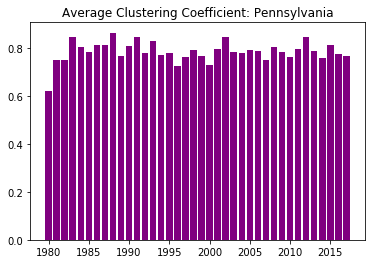

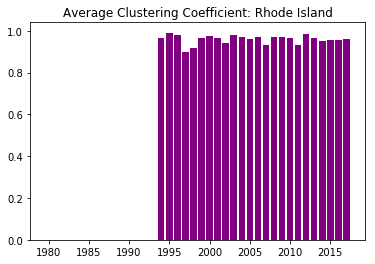

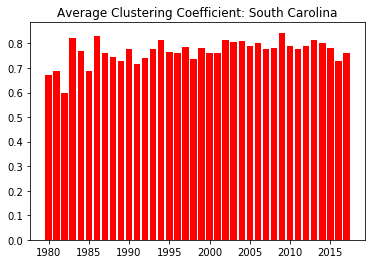

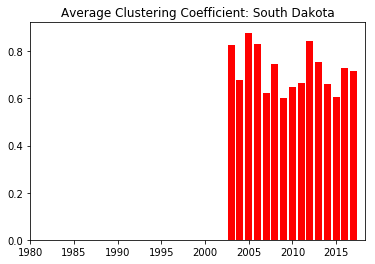

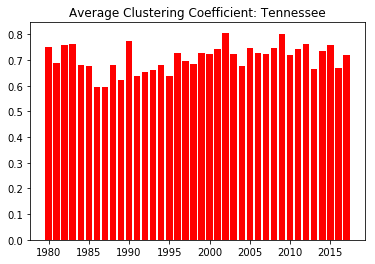

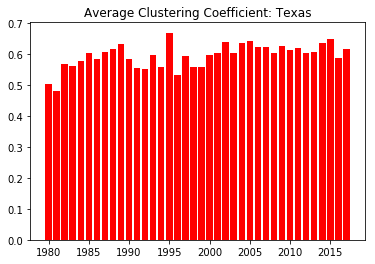

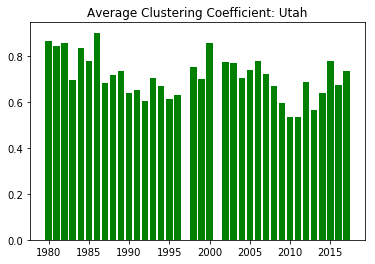

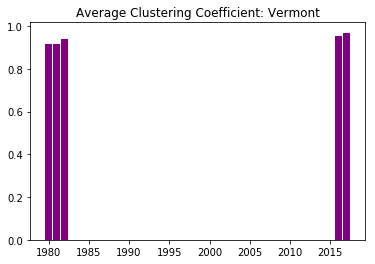

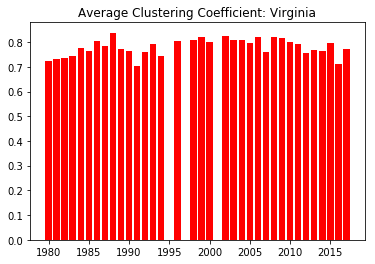

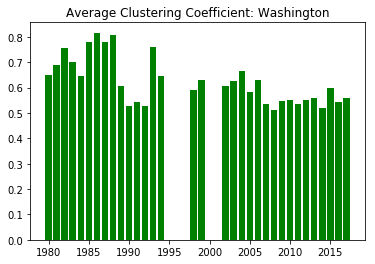

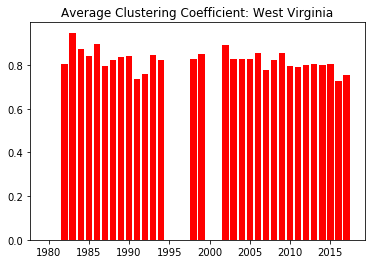

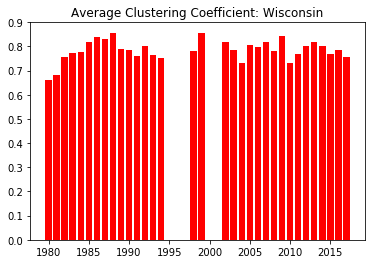

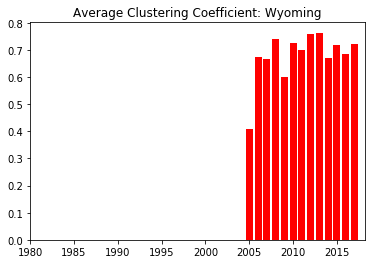

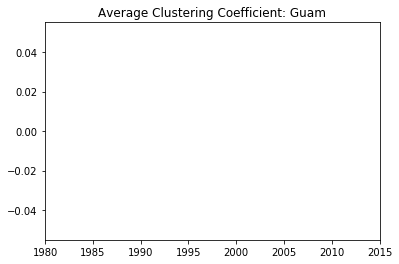

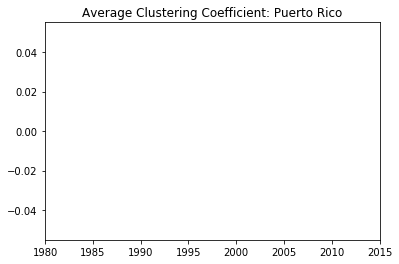

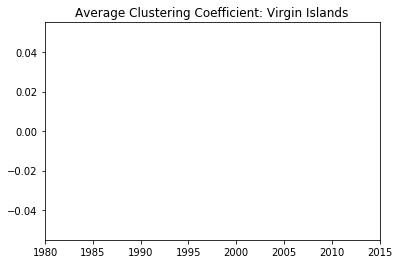

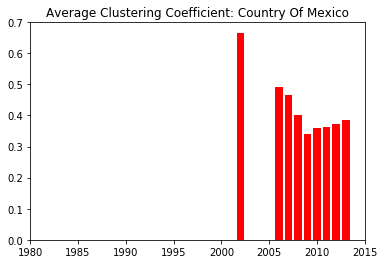

In [9]:
for codes in data:
    plt.close()
    #plt.subplots(figsize=(2,1),dpi=300)
    intCode = int(codes)
    if intCode in carbA:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]],label=stateCodes[int(codes)],color='g')
    elif intCode in carbB:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]],label=stateCodes[int(codes)],color='purple')
    else:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]],label=stateCodes[int(codes)],color='r')

    plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
    plt.title("Average Clustering Coefficient: {}".format(stateCodes[int(codes)].replace('"','')))
    plt.show()

In [10]:
pickle.dump(regionData,open("clusteringCoefRegion_newcarb.pickle",'wb'))

In [11]:
regionData

OrderedDict([('1980',
              {'NEWCARBA': 0.4510548937984582,
               'NEWCARBB': 0.4921413194082722,
               'NEWNONCARB': 0.428917330010527}),
             ('1981',
              {'NEWCARBA': 0.45419115365351725,
               'NEWCARBB': 0.5172838768674517,
               'NEWNONCARB': 0.390411528146622}),
             ('1982',
              {'NEWCARBA': 0.43954480355662706,
               'NEWCARBB': 0.4993349781439137,
               'NEWNONCARB': 0.3966938732043998}),
             ('1983',
              {'NEWCARBA': 0.45143893841785826,
               'NEWCARBB': 0.6004140117164118,
               'NEWNONCARB': 0.4362386426075244}),
             ('1984',
              {'NEWCARBA': 0.45212745377637176,
               'NEWCARBB': 0.5443242324708562,
               'NEWNONCARB': 0.40108538226603596}),
             ('1985',
              {'NEWCARBA': 0.45306928517841155,
               'NEWCARBB': 0.5414103187785416,
               'NEWNONCARB': 0.39289075222660

In [12]:
regionData

OrderedDict([('1980',
              {'NEWCARBA': 0.4510548937984582,
               'NEWCARBB': 0.4921413194082722,
               'NEWNONCARB': 0.428917330010527}),
             ('1981',
              {'NEWCARBA': 0.45419115365351725,
               'NEWCARBB': 0.5172838768674517,
               'NEWNONCARB': 0.390411528146622}),
             ('1982',
              {'NEWCARBA': 0.43954480355662706,
               'NEWCARBB': 0.4993349781439137,
               'NEWNONCARB': 0.3966938732043998}),
             ('1983',
              {'NEWCARBA': 0.45143893841785826,
               'NEWCARBB': 0.6004140117164118,
               'NEWNONCARB': 0.4362386426075244}),
             ('1984',
              {'NEWCARBA': 0.45212745377637176,
               'NEWCARBB': 0.5443242324708562,
               'NEWNONCARB': 0.40108538226603596}),
             ('1985',
              {'NEWCARBA': 0.45306928517841155,
               'NEWCARBB': 0.5414103187785416,
               'NEWNONCARB': 0.39289075222660